In [1]:
import pandas as pd
from pycaret.regression import *
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("fina.csv")
df = df.drop(['Unnamed: 0'], axis = 1) 
df

,Fare,distance,passenger_count,year,Month,Date,Hour,Minute,Second
0,4.5,1.030765,1.0,2009,6,15,17,26,21
1,16.9,8.450145,1.0,2010,1,5,16,52,16
2,5.7,1.389527,2.0,2011,8,18,0,35,0
3,7.7,2.799274,1.0,2012,4,21,4,30,42
4,5.3,1.999160,1.0,2010,3,9,7,51,0
...,...,...,...,...,...,...,...,...,...
15580,6.5,0.850046,1.0,2014,12,12,7,41,0
15581,16.1,7.867649,2.0,2009,7,13,7,58,0
15582,8.5,1.469108,1.0,2009,11,11,11,19,7
15583,8.1,2.590040,1.0,2010,5,11,23,53,0


In [3]:
df = df.drop(['passenger_count', 'year', 'Date', 'Minute', 'Second'], axis = 1) 
df

,Fare,distance,Month,Hour
0,4.5,1.030765,6,17
1,16.9,8.450145,1,16
2,5.7,1.389527,8,0
3,7.7,2.799274,4,4
4,5.3,1.999160,3,7
...,...,...,...,...
15580,6.5,0.850046,12,7
15581,16.1,7.867649,7,7
15582,8.5,1.469108,11,11
15583,8.1,2.590040,5,23


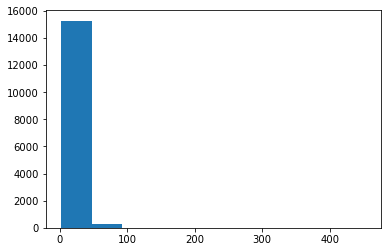

In [4]:
plt.hist(df['Fare'])
plt.show()

#### Regression Module in PyCaret

PyCaret's Regression module (pycaret.regression) is a supervised machine learning module which is used for predicting continuous values / outcomes using various techniques and algorithms. 

PyCaret's regression module has over 25 algorithms and 10 plots to analyze the performance of models. Be it hyper-parameter tuning, ensembling or advanced techniques like stacking, PyCaret's regression module has it all.

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline.

#### Parameters 

data pandas.DataFrame - Shape (n_samples, n_features), where n_samples is the number of samples and n_features is the number of features.

target: str - Name of the target column to be passed in as a string. The target variable can be either binary or multiclass.

train_size: float, default = 0.7

normalize: bool, default = False - it transforms the numeric features by scaling them to a given range.

normalize_method: str, default = ‘zscore’ - Defines the method for scaling. By default, normalize method is set to ‘zscore’ The standard zscore is calculated as z = (x - u) / s.

transformation: bool, default = False - it applies the power transform to make data more Gaussian-like.

transformation_method: str, default = ‘yeo-johnson’ - By default, the transformation method is set to ‘yeo-johnson’. The other available option for transformation is ‘quantile’. 

remove_outliers: bool, default = False - When set to True, outliers from the training data are removed using the Singular Value Decomposition.

outliers_threshold: float, default = 0.05 - The percentage outliers to be removed from the training dataset. 

remove_multicollinearity: bool, default = False - features with the inter-correlations higher than the defined threshold are removed. When two features are highly correlated with each other, the feature that is less correlated with the target variable is removed.

multicollinearity_threshold: float, default = 0.9 - Threshold for correlated features. 

remove_perfect_collinearity: bool, default = True - perfect collinearity (features with correlation = 1) is removed from the dataset, when two features are 100% correlated, one of it is randomly removed from the dataset.

transform_target: bool, default = False - target variable is transformed using the method defined in transform_target_method param.

transform_target_method: str, default = ‘box-cox’ - ‘Box-cox’ and ‘yeo-johnson’ methods are supported. Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data. When transform_target_method is ‘box-cox’ and target variable contains negative values, method is internally forced to ‘yeo-johnson’ to avoid exceptions.

data_split_shuffle: bool, default = True - shuffling of rows during ‘train_test_split’.

fold_strategy: str or sklearn CV generator object, default = ‘kfold’
fold: int, default = 10 - Number of folds to be used in cross validation.

In [5]:
exp = setup(data = df, target = 'Fare', normalize = True, transformation = True, remove_outliers = True, remove_multicollinearity = True, transform_target = True,)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,4621
1,Transform Target,True
2,Transform Target Method,box-cox
3,Original Data,"(15585, 4)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


#### Comparing different models

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed. This function trains all models in the model library and scores them using k-fold cross validation for metric evaluation. The output prints a score grid that shows average MAE, MSE, RMSE, R2, RMSLE and MAPE accross the folds (10 by default) along with training time.

In [6]:
best_model = compare_models(whitelist = ['lr','lasso','ridge', 'en', 'svm', 'knn', 'dt', 'rf', 'et', 'ada', 'gbr'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Support Vector Machine,2.1191,51.5458,5.9472,0.6419,0.2435,0.1824,8.4923
1,Gradient Boosting Regressor,2.1324,52.0275,5.9978,0.6368,0.2428,0.1859,1.4438
2,Random Forest,2.2731,53.2780,6.1259,0.6206,0.2563,0.2020,1.6923
3,Extra Trees Regressor,2.4134,53.9715,6.2050,0.6093,0.2704,0.2188,1.5564
4,K Neighbors Regressor,2.3388,54.4834,6.2306,0.6062,0.2604,0.2033,0.1382
5,Linear Regression,2.3301,56.3178,6.4392,0.5789,0.2517,0.1917,0.0141
6,Ridge Regression,2.3297,56.3225,6.4391,0.5789,0.2517,0.1917,0.0103
7,AdaBoost Regressor,2.8744,66.8570,7.3425,0.4373,0.2969,0.2327,0.5297
8,Elastic Net,4.1445,96.0414,9.2659,0.0550,0.4366,0.3364,0.0114
9,Lasso Regression,4.7216,105.7366,9.8093,-0.0748,0.5089,0.4072,0.0116


lr’	Linear Regression

‘lasso’	Lasso Regression

‘ridge’	Ridge Regression

‘en’	Elastic Net

‘svm’	Support Vector Machine

‘knn’	K Neighbors Regressor

‘dt’	Decision Tree

‘rf’	Random Forest

‘et’	Extra Trees Regressor

‘ada’	AdaBoost Regressor

‘gbr’	Gradient Boosting Regressor

#### Create a Model

This function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows MAE, MSE, RMSE, R2, RMSLE and MAPE by fold.

In [7]:
svm = create_model('svm', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.0694,15.2413,3.9040,0.7494,0.2480,0.1852
1,2.3931,194.3290,13.9402,0.2044,0.2561,0.1825
2,2.2141,16.7026,4.0869,0.7638,0.2455,0.1897
3,1.9904,14.6996,3.8340,0.7498,0.2383,0.1813
4,1.9583,16.9628,4.1186,0.7391,0.2335,0.1761
Mean,2.1251,51.5870,5.9767,0.6413,0.2443,0.1829
SD,0.1605,71.3761,3.9832,0.2186,0.0078,0.0045


In [8]:
print(svm)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [9]:
rf = create_model('rf', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1936,15.7084,3.9634,0.7418,0.2579,0.2035
1,2.5175,195.6721,13.9883,0.1989,0.2662,0.1973
2,2.3999,20.6462,4.5438,0.7080,0.2627,0.2083
3,2.1193,15.0479,3.8792,0.7439,0.2439,0.1989
4,2.1424,18.5993,4.3127,0.7139,0.2519,0.2020
Mean,2.2745,53.1348,6.1375,0.6213,0.2565,0.2020
SD,0.1568,71.2972,3.9327,0.2117,0.0079,0.0038


In [10]:
print(rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=4621, verbose=0, warm_start=False)


In [11]:
lr = create_model('lr', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.2965,20.4704,4.5244,0.6635,0.2568,0.1950
1,2.5754,198.5482,14.0907,0.1872,0.2602,0.1892
2,2.4355,22.6098,4.7550,0.6802,0.2563,0.1999
3,2.1978,18.8194,4.3381,0.6797,0.2468,0.1908
4,2.1521,21.1886,4.6031,0.6741,0.2403,0.1844
Mean,2.3314,56.3273,6.4623,0.5769,0.2521,0.1919
SD,0.1559,71.1209,3.8166,0.1950,0.0074,0.0053


In [12]:
print(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)


#### Tune Model

When a model is created using the create_model function it uses the default hyperparameters to train the model. In order to tune hyperparameters, the tune_model function is used. This function automatically tunes the hyperparameters of a model using Random Grid Search on a pre-defined search space. The output prints a score grid that shows MAE, MSE, RMSE, R2, RMSLE and MAPE by fold.

In [17]:
tuned_svm = tune_model(svm, optimize = 'MAPE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.3544,40.7287,6.3819,0.3200,0.3459,0.2853
1,3.1866,40.8723,6.3931,0.3380,0.3289,0.2580
2,3.5600,226.1002,15.0366,0.0907,0.3395,0.2719
3,3.6349,212.1439,14.5652,0.1155,0.3379,0.2701
4,3.2852,35.1235,5.9265,0.3633,0.3322,0.2606
5,3.7499,59.3571,7.7044,0.3121,0.3595,0.2863
6,3.1316,35.9927,5.9994,0.3707,0.3170,0.2630
7,3.0927,38.9673,6.2424,0.3540,0.3258,0.2710
8,3.4263,51.2453,7.1586,0.3300,0.3409,0.2636
9,3.0584,32.8605,5.7324,0.3844,0.3138,0.2663


In [18]:
tuned_lr = tune_model(lr, optimize = 'MAPE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.3101,20.3090,4.5065,0.6609,0.2620,0.1971
1,2.2779,20.5268,4.5306,0.6675,0.2513,0.1925
2,2.6108,207.2137,14.3949,0.1667,0.2690,0.1947
3,2.5417,189.8522,13.7787,0.2084,0.2512,0.1840
4,2.3125,18.0217,4.2452,0.6733,0.2501,0.1919
5,2.5549,27.1087,5.2066,0.6858,0.2622,0.2075
6,2.1343,15.5787,3.9470,0.7276,0.2282,0.1817
7,2.2626,22.2568,4.7177,0.6310,0.2642,0.1996
8,2.3274,28.2578,5.3158,0.6305,0.2566,0.1903
9,1.9691,14.0531,3.7487,0.7367,0.2222,0.1780


In [19]:
print(tuned_svm)

SVR(C=3.214, cache_size=200, coef0=0.0, degree=3, epsilon=1.35, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=False, tol=0.001, verbose=False)


In [20]:
print(tuned_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)


#### Evaluate Model

In [21]:
evaluate_model(tuned_svm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [22]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#### Predict on Test / Hold-out Sample

You will see that 30% of the data has been separated out as a test/hold-out sample. All of the evaluation metrics we have seen above are cross-validated results based on training set (70%) only. Now, using our final trained model stored in the tuned_lightgbm variable we will predict the hold-out sample and evaluate the metrics to see if they are materially different than the CV results.

In [26]:
predict_model(tuned_svm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Support Vector Regressor,3.3048,41.743,6.4609,0.3582,0.3349,0 0.273662 dtype: float64


,distance,Hour,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,0,Label
0,-0.733974,-0.354716,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.5,6.9783
1,1.755462,0.115365,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.1,17.8701
2,0.747698,1.662802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24.0,11.3498
3,-0.450695,0.651633,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.7,8.7375
4,-1.231092,-0.634214,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.8160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4437,0.372258,0.651633,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.3,12.2890
4438,1.765842,0.115365,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,15.2500
4439,-1.550974,1.450214,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.7,4.9482
4440,0.638140,-1.140016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.7,15.2886


In [27]:
predict_model(tuned_lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,2.2703,20.27,4.5022,0.6884,0.2496,0 0.196857 dtype: float64


,distance,Hour,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,0,Label
0,-0.733974,-0.354716,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.5,6.1175
1,1.755462,0.115365,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.1,24.9177
2,0.747698,1.662802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24.0,12.5883
3,-0.450695,0.651633,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.7,6.8852
4,-1.231092,-0.634214,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.1860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4437,0.372258,0.651633,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.3,10.0549
4438,1.765842,0.115365,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,23.0990
4439,-1.550974,1.450214,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.7,4.5489
4440,0.638140,-1.140016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.7,11.7836


The R2 on the test/hold-out set is 0.9678 compared to 0.9704 achieved on tuned_lightgbm CV results (in section 9.2 above). 

#### Finalize Model

The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [28]:
final_svm = finalize_model(tuned_svm)

In [32]:
final_lr = finalize_model(tuned_lr)

In [29]:
print(final_svm)

SVR(C=3.214, cache_size=200, coef0=0.0, degree=3, epsilon=1.35, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=False, tol=0.001, verbose=False)


In [33]:
predict_model(final_lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,2.269,20.2631,4.5015,0.6885,0.2493,0 0.196617 dtype: float64


,distance,Hour,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,0,Label
0,-0.733974,-0.354716,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.5,6.1547
1,1.755462,0.115365,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.1,24.9289
2,0.747698,1.662802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24.0,12.6207
3,-0.450695,0.651633,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.7,6.8315
4,-1.231092,-0.634214,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.1806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4437,0.372258,0.651633,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.3,9.9631
4438,1.765842,0.115365,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,23.1393
4439,-1.550974,1.450214,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.7,4.5252
4440,0.638140,-1.140016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.7,11.7289


In [31]:
predict_model(final_svm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Support Vector Regressor,3.2182,39.4742,6.2829,0.3931,0.3219,0 0.267063 dtype: float64


,distance,Hour,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,0,Label
0,-0.733974,-0.354716,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.5,7.3623
1,1.755462,0.115365,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.1,17.2498
2,0.747698,1.662802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24.0,12.5884
3,-0.450695,0.651633,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.7,8.5404
4,-1.231092,-0.634214,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.7760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4437,0.372258,0.651633,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.3,12.2363
4438,1.765842,0.115365,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,15.1819
4439,-1.550974,1.450214,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.7,4.9744
4440,0.638140,-1.140016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.7,13.9889


Notice how the R2 in the final_lightgbm has increased to 0.9897 from 0.9678, even though the model is same. This is because the final_lightgbm variable is trained on the complete dataset including the test/hold-out set.



In [34]:
save_model(final_svm, 'zsvm')

Transformation Pipeline and Model Succesfully Saved


In [35]:
save_model(final_lr, 'zlr')

Transformation Pipeline and Model Succesfully Saved
